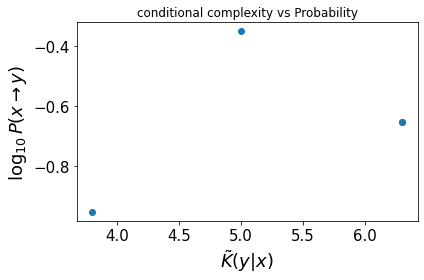

In [4]:
# For Umar
import numpy as np
#import LZ78Complexity
import KC # used for Lempel-Ziv complexity estimation
import matplotlib.pyplot as plt
import math as mt

file1 = open("possible_new_unique_str_count_prob.txt","r")
file2 = open("possible_new_unique_str.txt","r")
file3 = open("possible_new_unique_str_prob.txt","r")


str_size = 3

str_arr = file1.read()
BinaryString =str_arr[0:str_size] 
#print(BinaryString)

str_arr1 = file2.read()
str_arrlist = str_arr1.split("\n")
str_arrlist.pop()

prob_arr = file3.read()
prob_arrlist = prob_arr.split("\n")
prob_arrlist.pop()

#print(BinaryString)
#print(str_arrlist)
#print(prob_arrlist)

k = KC.calc_KC(BinaryString)
k1 = round(k,1)
#print(k1)

str_arrlist_con= []
for i in range(0,len(str_arrlist)):
    w_temp = str_arrlist[i]
    str_arrlist_con.append(BinaryString+w_temp)
#print(str_arrlist_con)

Z = []
for s in str_arrlist_con:
    k = KC.calc_KC(s)
    Z.append(np.round(k,1))
#print(Z)

Z1 = Z-k1
#print(Z1)

upper_bound = []

for i in range(0,len(Z1)):
    temp = 1/pow(2,float(Z1[i]))
    upper_bound.append(temp)



# sum of probabilities    
nplist = np.array(prob_arrlist)
#print(nplist)

final_prob = []
for i in range(0, len(nplist)):
    q = nplist[i]
    qlog = mt.log10(float(q))
    final_prob.append(qlog)

#print(final_prob)

plt.figure()
#plt.plot(Z1, upper_bound)
plt.scatter(Z1,final_prob)
plt.title('conditional complexity vs Probability')
plt.ylabel(r'$\log_{10} P(x \rightarrow y)$',fontsize=18)
plt.xlabel(r'$\tilde{K}(y|x)$',fontsize=18)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.tight_layout()
plt.savefig('Conditional_Complexity_probability.png')
plt.show()

file1.close()
file2.close()
file3.close()